<a href="https://colab.research.google.com/github/gonzadzz00/proyecto_final_coder/blob/main/entrega1_diaz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Empresa: Diaz Analytics
### Descripcion: Somos una joven empresa dedicada al estudio y proyección de precio de las principales criptomonedas


### problema planteado: *Análisis de volatibilidad/caida del precio de las criptomonedas*


### Preguntas y objetivos de la investigación: ¿Cuáles son las causas principales de la última caída del Bitcoin? ¿Qué son los ciclos económicos y cómo afectan a las criptomonedas? 




ANÁLISIS DE LA VOLATILIDAD DEL BITCOIN:

https://docs.google.com/document/d/1x27uQVPq9TgbgFEBj3RKol5pSxwypyo_VVVPzJUDTbE/edit?usp=sharing



# Rubricas

### Se debe entregar:
Presentación de la empresa, organización o problema específico.
Preguntas y objetivos de la investigación.
Conformación del equipo de trabajo.
Indicación de la fuente del dataset y los criterios de selección (Data Acquisition).
Generación del primer Data Wrangling y EDA, apuntado a sus datos (insights) univariado, bivariado y multivariado.
Análisis de componentes principales.
Contar la historia de sus datos
Filtros aplicados a los datos. Distribución. Dataset final para analizar.
Plantear objetivo/s para esos datos.


# team: 

* Gonzalo Díaz
* Franco Agustin De Salvo
* Florencia Bustelo


## Indicación de la fuente del dataset y los criterios de selección (Data Acquisition).

descripcion: 

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
pip install mplfinance

     |████████████████████████████████| 70 kB 4.8 MB/s 


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf

In [7]:
#DATASET DEL BITCOIN
btc=pd.read_csv('/content/drive/MyDrive/Nueva carpeta/BTC-USD.csv')
btc.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


In [8]:
btc.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

Columnas del dataset:

-Open: precio de la primera transaccion de la jornada 
-High: precio máximo alcanzado en el dia -Low: precio minimo -Close:precio de cierre en el dia 
-Adj Close: El precio de cierre ajustado tiene en cuenta todos los factores que pueden haber afectado el precio de las acciones después del horario de mercado. El precio de cierre ajustado es una mejor herramienta para analizar los rendimientos históricos de una acción.
 -Volume: El volumen es una medida de cantidad. En el trading, el volumen es la cantidad de un activo concreto en el que se invierte durante un período de tiempo determinado. El volumen es un indicador clave de la actividad de mercado y la liquidez, lo que implica que, a menudo, se presenta junto a la información del precio.

In [9]:
btc.shape

(2651, 7)

In [10]:
btc.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [11]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2651 entries, 0 to 2650
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2651 non-null   object 
 1   Open       2647 non-null   float64
 2   High       2647 non-null   float64
 3   Low        2647 non-null   float64
 4   Close      2647 non-null   float64
 5   Adj Close  2647 non-null   float64
 6   Volume     2647 non-null   float64
dtypes: float64(6), object(1)
memory usage: 145.1+ KB


In [12]:
btc.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,2647.0,1.057292e+04,1.554248e+04,1.768970e+02,5.882845e+02,5.996790e+03,1.013942e+04,6.754973e+04
High,2647.0,1.086361e+04,1.597354e+04,2.117310e+02,5.975275e+02,6.223780e+03,1.034415e+04,6.878962e+04
Low,2647.0,1.025331e+04,1.504643e+04,1.715100e+02,5.843020e+02,5.794716e+03,9.780992e+03,6.638206e+04
Close,2647.0,1.058825e+04,1.555247e+04,1.781030e+02,5.900870e+02,6.011450e+03,1.014328e+04,6.756683e+04
Adj Close,2647.0,1.058825e+04,1.555247e+04,1.781030e+02,5.900870e+02,6.011450e+03,1.014328e+04,6.756683e+04
Volume,2647.0,1.423996e+10,1.994227e+10,5.914570e+06,7.655740e+07,4.867830e+09,2.357824e+10,3.509679e+11


In [14]:
#Cambiamos el tipo de dato Date a 'datetime'
btc.Date=pd.to_datetime(btc.Date)
btc.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object

In [15]:
#Elegimos la columna 'Date' como índice para graficar
btc=btc.set_index('Date')

In [17]:
#Asi se ve el dataset ahora
btc.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-15,48379.753906,49473.957031,46671.964844,48896.722656,48896.722656,3.654183e+10
2021-12-16,48900.464844,49425.574219,47529.878906,47665.425781,47665.425781,2.726815e+10
2021-12-17,47653.730469,48004.894531,45618.214844,46202.144531,46202.144531,3.290273e+10
2021-12-18,46219.253906,47313.828125,45598.441406,46848.777344,46848.777344,2.609829e+10
2021-12-19,46902.777344,47973.355469,46544.714844,47638.589844,47638.589844,2.563318e+10


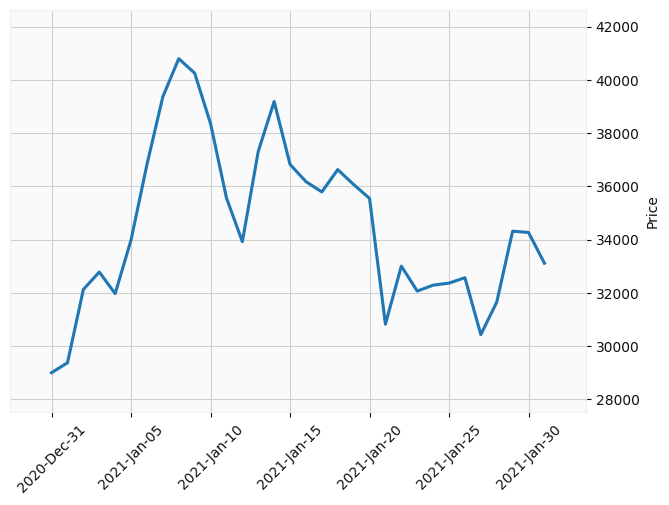

In [18]:
#Grafico del precio del BTC en un mes
mpf.plot(btc['2020-12-31':'2021-01-31'],style='yahoo',type='line')

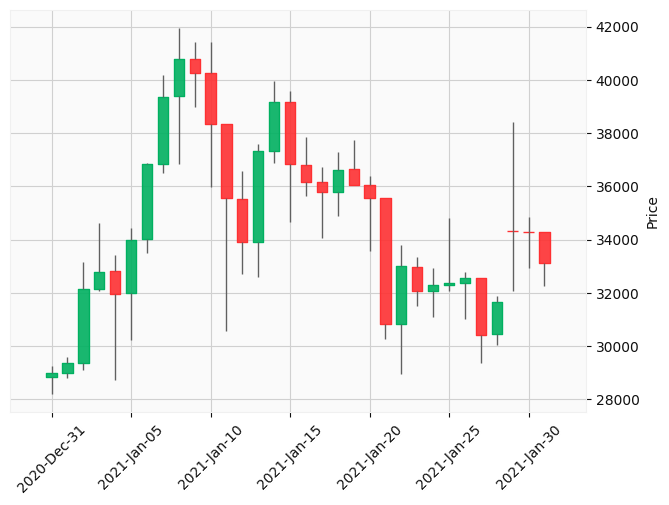

In [19]:
#Grafico de velas japonesas del BTC en un mes
mpf.plot(btc['2020-12-31':'2021-01-31'],style='yahoo',type='candle')

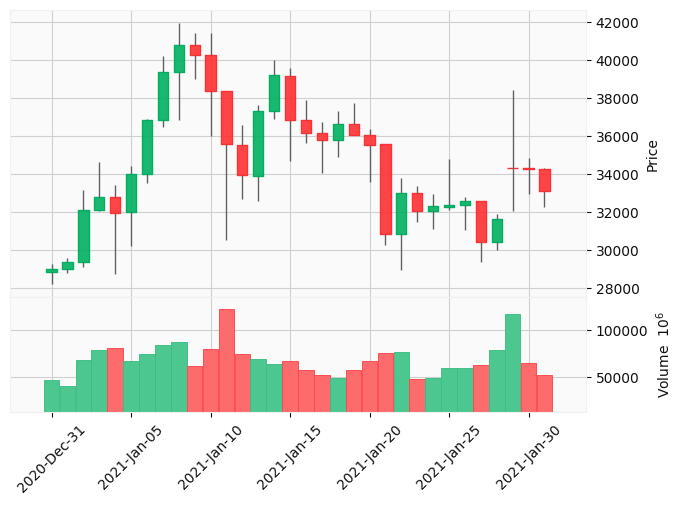

In [20]:
#Grafico de velas japonesas del BTC en un mes + Volumen
mpf.plot(btc['2020-12-31':'2021-01-31'],style='yahoo',type='candle',volume=True)

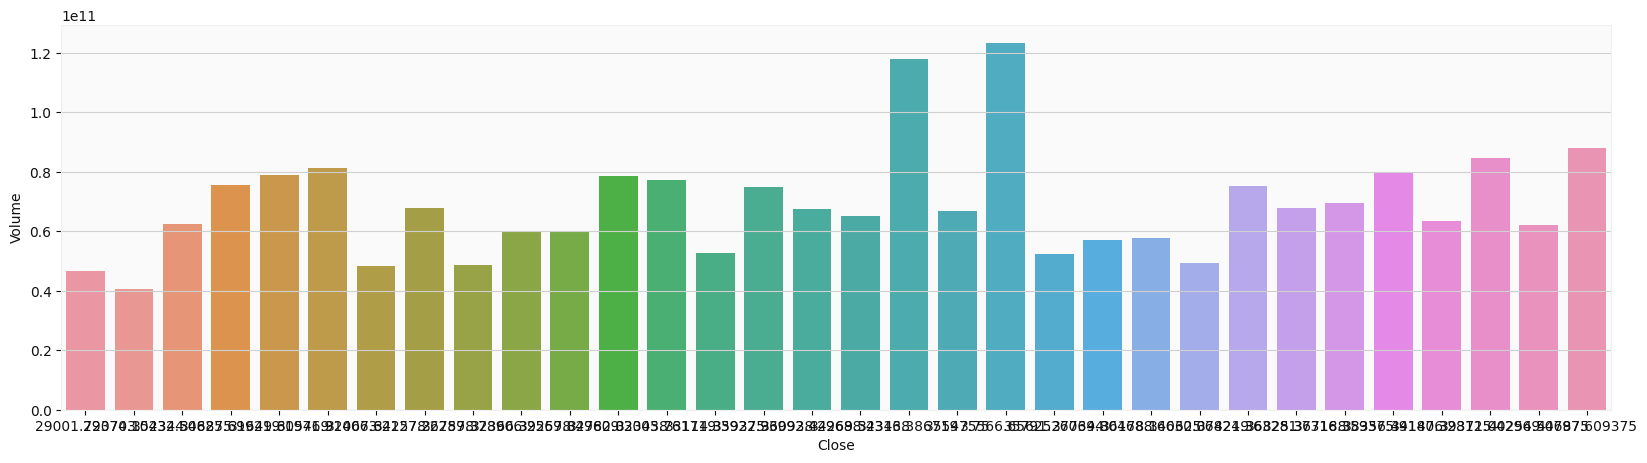

In [21]:
#Volumen de transacciones del BTC en un mes

plt.figure(figsize=(20,5))
sns.barplot(x='Close',y="Volume",data=btc['2020-12-31':'2021-01-31'])
plt.show()

In [ ]:
#comentar fuente de bases de datos
#criterio de seleccion
#noticias y tweets
#plot